# **Project Notebooks**
---
*   #### **Data Prepration & Exploration NoteBook (This NoteBook)**

*  #### **Model Training NoteBook**
https://colab.research.google.com/drive/1bPxTI7QDf5TYPOLdkNpLP3B1d9LfNnw1?usp=sharing


*  #### **Model Testing NoteBook**
https://colab.research.google.com/drive/187wXdbqfscd6Ky6fhl9PdXpl2dZhTwSc?usp=sharing



## **Importing Packges**

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 27.9 MB/s eta 0:00:00


In [2]:
import cv2,math
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import sys
from pycocotools.coco import COCO
import urllib
import zipfile
import glob
from google.colab.patches import cv2_imshow
from skimage import io
from math import cos, sin
import scipy.io as sio
import pandas as pd

## **Reading DataSet**

In [3]:
AFLW_url = 'http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip'
urllib.request.urlretrieve(AFLW_url , filename = 'AFLW2000.zip' )

with zipfile.ZipFile('AFLW2000.zip' , 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
data_list = []
mat_list = []

img_cnt=0

for image_path in glob.glob("/content/AFLW2000/*.jpg"):
    print(f"{img_cnt} - {image_path}")
    data_list.append(image_path)
    img_cnt+=1
    # image = io.imread(image_path)
    # cv2_imshow(image)
    # img = plt.imread(image_path)
    # plt.imshow(img)
    # plt.show()

for mat_path in glob.glob("/content/AFLW2000/*.mat"):
    mat_list.append(mat_path)

0 - /content/AFLW2000/image00499.jpg
1 - /content/AFLW2000/image01486.jpg
2 - /content/AFLW2000/image03799.jpg
3 - /content/AFLW2000/image01109.jpg
4 - /content/AFLW2000/image01688.jpg
5 - /content/AFLW2000/image03957.jpg
6 - /content/AFLW2000/image03782.jpg
7 - /content/AFLW2000/image00532.jpg
8 - /content/AFLW2000/image00577.jpg
9 - /content/AFLW2000/image02122.jpg
10 - /content/AFLW2000/image02674.jpg
11 - /content/AFLW2000/image03964.jpg
12 - /content/AFLW2000/image00863.jpg
13 - /content/AFLW2000/image02017.jpg
14 - /content/AFLW2000/image02032.jpg
15 - /content/AFLW2000/image01918.jpg
16 - /content/AFLW2000/image04230.jpg
17 - /content/AFLW2000/image01576.jpg
18 - /content/AFLW2000/image00934.jpg
19 - /content/AFLW2000/image02871.jpg
20 - /content/AFLW2000/image03907.jpg
21 - /content/AFLW2000/image01373.jpg
22 - /content/AFLW2000/image02050.jpg
23 - /content/AFLW2000/image02829.jpg
24 - /content/AFLW2000/image00280.jpg
25 - /content/AFLW2000/image03124.jpg
26 - /content/AFLW2000

## **Feature Extraction**

In [5]:
def extract_features(img, face_mesh, mat=None):
    NOSE = 1
    FOREHEAD = 10
    LEFT_EYE = 33
    MOUTH_LEFT = 61
    CHIN = 199
    RIGHT_EYE = 263
    MOUTH_RIGHT = 291

    result = face_mesh.process(img)
    face_features = []

    if result.multi_face_landmarks != None:
        for face_landmarks in result.multi_face_landmarks:
            for idx, lm in enumerate(face_landmarks.landmark):
                if idx in [FOREHEAD, NOSE, MOUTH_LEFT, MOUTH_RIGHT, CHIN, LEFT_EYE, RIGHT_EYE]:
                    face_features.append(lm.x)
                    face_features.append(lm.y)
    else:
        face_features.extend([None] * 14)
    
    if mat:
        pose_angles = mat['Pose_Para'][0][:3]
        face_features.extend(pose_angles)
        
    return face_features

## **Creating Data Frame**

In [6]:
cols = []
for pos in ['nose_', 'forehead_', 'left_eye_', 'mouth_left_', 'chin_', 'right_eye_', 'mouth_right_']:
    for dim in ('x', 'y'):
        cols.append(pos+dim)
cols.extend(['pitch', 'yaw', 'roll'])

In [7]:
face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
poses = []

for img_idx, img_path in enumerate(data_list):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    mat = sio.loadmat(mat_list[img_idx])
    face_features = extract_features(img, face_mesh, mat)
    poses.append(face_features)
    if img_idx % 100 == 0:
        print('Extracted images: ', img_idx)

poses_df = pd.DataFrame(poses, columns=cols)

Extracted images:  0
Extracted images:  100
Extracted images:  200
Extracted images:  300
Extracted images:  400
Extracted images:  500
Extracted images:  600
Extracted images:  700
Extracted images:  800
Extracted images:  900
Extracted images:  1000
Extracted images:  1100
Extracted images:  1200
Extracted images:  1300
Extracted images:  1400
Extracted images:  1500
Extracted images:  1600
Extracted images:  1700
Extracted images:  1800
Extracted images:  1900


In [8]:
poses_df

,nose_x,nose_y,forehead_x,forehead_y,left_eye_x,left_eye_y,mouth_left_x,mouth_left_y,chin_x,chin_y,right_eye_x,right_eye_y,mouth_right_x,mouth_right_y,pitch,yaw,roll
0,0.508065,0.618530,0.616757,0.283798,0.378097,0.401824,0.372199,0.663082,0.422852,0.808474,0.707475,0.522665,0.543664,0.726624,0.758220,1.191774,0.751087
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004769,-0.022654,-0.001833
2,0.539672,0.612833,0.409729,0.320937,0.319459,0.537305,0.444169,0.713631,0.600985,0.798996,0.609518,0.418110,0.641840,0.632342,-0.461113,-1.372663,0.508271
3,0.479451,0.604121,0.466947,0.329683,0.365209,0.517700,0.440307,0.682836,0.524996,0.784532,0.636129,0.474694,0.599474,0.660368,0.072609,0.131508,0.017875
4,0.562461,0.582324,0.501192,0.336663,0.368117,0.502097,0.462611,0.687573,0.546574,0.764271,0.606819,0.471318,0.586158,0.662821,2.316127,1.430669,2.337543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.620673,0.585285,0.504539,0.331914,0.405458,0.509754,0.486567,0.696190,0.620810,0.814558,0.615169,0.488876,0.640025,0.680426,0.588442,-1.040858,-0.374304
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.072596,0.061031,-0.048805
1997,0.448416,0.589094,0.579442,0.387159,0.458044,0.465105,0.424415,0.636657,0.434892,0.723104,0.650495,0.562765,0.519936,0.691901,-0.263568,1.152658,-0.426291
1998,0.544581,0.595692,0.570166,0.344280,0.423214,0.458189,0.455642,0.655821,0.505559,0.746889,0.647185,0.514486,0.584993,0.676148,-0.397413,-0.115143,-0.376447


## **Saving Dataframe To CSV**

In [ ]:
poses_df.to_csv('./Head_Poses.csv', index=False)

## **Functions Testing**

In [ ]:
def draw_imp_features(img_path, mat=None):
  
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_h, img_w, img_c = img.shape
    face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    feature_arr = extract_features(img, face_mesh,mat)
    annot_img = img.copy()

    for i in range(len(feature_arr)//2):
            cv2.circle(annot_img, center=[int(feature_arr[i*2]*img_w), int(feature_arr[i*2+1]*img_h)], radius=3, color=(0, 0, 255))
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(annot_img);

## **Helper Funtions**

In [ ]:
def draw_mesh_grid(img_path):

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  face_mesh = mp.solutions.face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
  drawing_specs = mp.solutions.drawing_utils.DrawingSpec(thickness=1, circle_radius=1)
  result = face_mesh.process(img)

  img_h, img_w, img_c = img.shape
  annot_img = img.copy()

  if result.multi_face_landmarks != None:
      for face_landmarks in result.multi_face_landmarks:        
          mp.solutions.drawing_utils.draw_landmarks(image=annot_img, landmark_list=face_landmarks, landmark_drawing_spec=drawing_specs)
          for idx, lm in enumerate(result.multi_face_landmarks[0].landmark):
              if idx == 1:
                  nose_x = lm.x * img_w
                  nose_y = lm.y * img_h

  print('nose position: ', (nose_x, nose_y))
  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(annot_img);
  return nose_x , nose_y


In [ ]:
# def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

#     yaw = -yaw
#     if tdx != None and tdy != None:
#         tdx = tdx
#         tdy = tdy
#     else:
#         height, width = img.shape[:2]
#         tdx = width / 2
#         tdy = height / 2

#     # X-Axis pointing to right. drawn in red
#     x1 = size * (cos(yaw) * cos(roll)) + tdx
#     y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

#     # Y-Axis | drawn in green
#     #        v
#     x2 = size * (-cos(yaw) * sin(roll)) + tdx
#     y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

#     # Z-Axis (out of the screen) drawn in blue
#     x3 = size * (sin(yaw)) + tdx
#     y3 = size * (-cos(yaw) * sin(pitch)) + tdy

#     cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
#     cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

#     return img

In [ ]:
def draw_axes(img, pitch, yaw, roll, tx, ty, size=50):
    yaw = -yaw
    rotation_matrix = cv2.Rodrigues(np.array([pitch, yaw, roll]))[0].astype(np.float64)
    axes_points = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]
    ], dtype=np.float64)
    axes_points = rotation_matrix @ axes_points
    axes_points = (axes_points[:2, :] * size).astype(int)
    axes_points[0, :] = axes_points[0, :] + tx
    axes_points[1, :] = axes_points[1, :] + ty
    
    new_img = img.copy()
    cv2.line(new_img, tuple(axes_points[:, 3].ravel()), tuple(axes_points[:, 0].ravel()), (255, 0, 0), 3)
    cv2.putText(new_img, 'x', tuple(axes_points[:, 0].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 0, 0), 1)
    
    cv2.line(new_img, tuple(axes_points[:, 3].ravel()), tuple(axes_points[:, 1].ravel()), (0, 255, 0), 3)
    cv2.putText(new_img, 'y', tuple(axes_points[:, 1].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 255, 0), 1)
    
    cv2.line(new_img, tuple(axes_points[:, 3].ravel()), tuple(axes_points[:, 2].ravel()), (0, 0, 255), 3)
    cv2.putText(new_img, 'z', tuple(axes_points[:, 2].ravel()), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 255), 1)

    return new_img

In [ ]:
def apply_axis_on_image(img_path,mat_path,px,py):  
  image = cv2.imread(img_path)
  # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
  mat_file = sio.loadmat(mat_path)
  # extracting the labels 3 angels
  pose_para = mat_file["Pose_Para"][0][:3]
  pitch = pose_para[0]
  yaw = pose_para[1]
  roll = pose_para[2]
  cv2_imshow(draw_axes(image,pitch,yaw,roll,px,py))

nose position:  (222.9802832007408, 280.1008343696594)



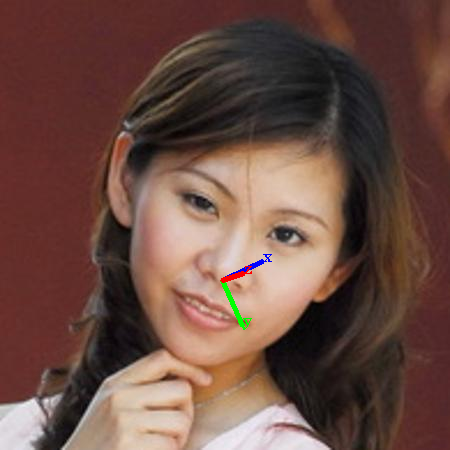

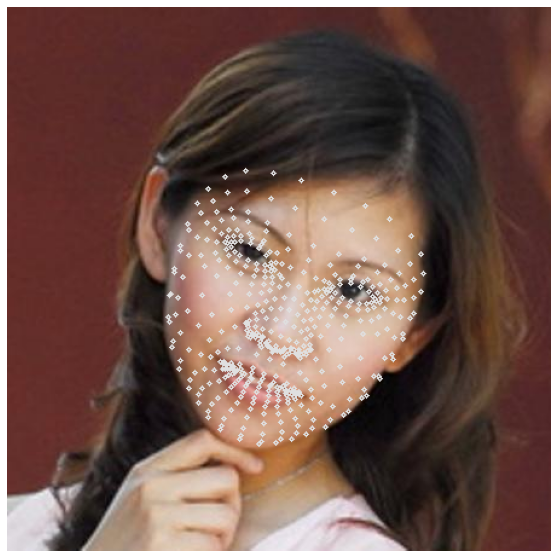

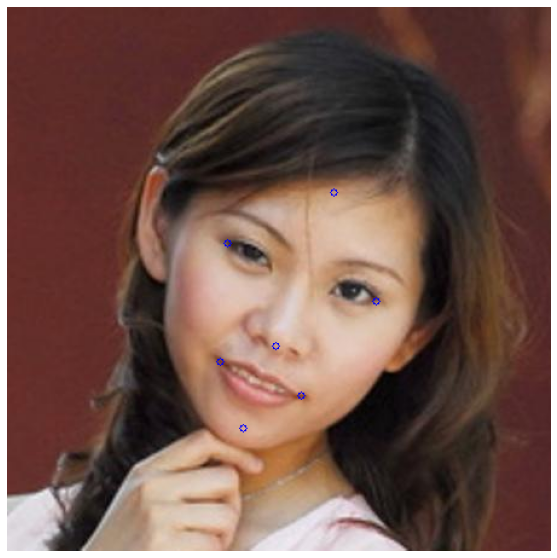

In [ ]:
selected_img=2

# Applying Mesh grid on image
nose_x,nose_y=draw_mesh_grid(data_list[selected_img])
print()
# drawing axis on image
apply_axis_on_image(data_list[selected_img],mat_list[selected_img],nose_x,nose_y)
print()
draw_imp_features(data_list[selected_img])

In [ ]:
for i in range(len(data_list)):
  print(f"img #- {i}")
  apply_axis_on_image(data_list[i],mat_list[i])
  print()

------------------------------------------------------------------------------

# **Tgarob**

In [ ]:
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

In [ ]:
sample_img = cv2.imread('/content/Sample_img.png')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [ ]:
for i in range(len(data)):
  sample_img = cv2.imread(data[i])
  face_detection_results = face_detection.process(sample_img[:,:,::-1])

  if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):

        print(f'FACE NUMBER: {i+1}')
        print('==============================')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        face_data = face.location_data

        print(f'nFACE BOUNDING BOX:n{face_data.relative_bounding_box}')

        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')


In [ ]:
copied_data=data.copy()
copied_data

In [ ]:
for i in range(len(copied_data)):
  sample_img = cv2.imread(copied_data[i])

  if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=sample_img, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
  fig = plt.figure(figsize = [10, 10])
  plt.title("Resultant Image");plt.axis('off');plt.imshow(sample_img);plt.show()

---------------

In [ ]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        face_data = face.location_data

        print(f'nFACE BOUNDING BOX:n{face_data.relative_bounding_box}')

        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

In [ ]:
img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()

# **Recources**

https://www.analyticsvidhya.com/blog/2022/03/detect-the-faces-in-the-image-using-the-mediapipe-library/v


http://cvlab.cse.msu.edu/lfw-and-aflw2000-datasets.html

https://stackoverflow.com/questions/72276749/problem-to-load-an-image-dataset-in-google-colab-from-google-drive

https://niruhan.medium.com/downloading-a-dataset-and-displaying-an-image-in-google-colab-5370f20b236d

**Dealing With Videos**

https://www.youtube.com/watch?v=YjWh7QvVH60
